In [1]:
%matplotlib notebook
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np
import scatter
from ipywidgets import interact
from scipy.constants import Avogadro
import pandas as pd

In [2]:
df = pd.read_csv('mass_coefficients.csv', names = ['', 'Energy', 'mu/rho', 'mu_en/rho', 'Z'], header=1)
df['Energy'] = df['Energy']*1000.

mass = pd.read_csv("atomic_mass.csv", delim_whitespace=True)
mass

df = df.join(mass.set_index('Z'), on='Z')

df['SIGMA'] = df['mu/rho']*df['Mass']/Avogadro

<IPython.core.display.Javascript object>


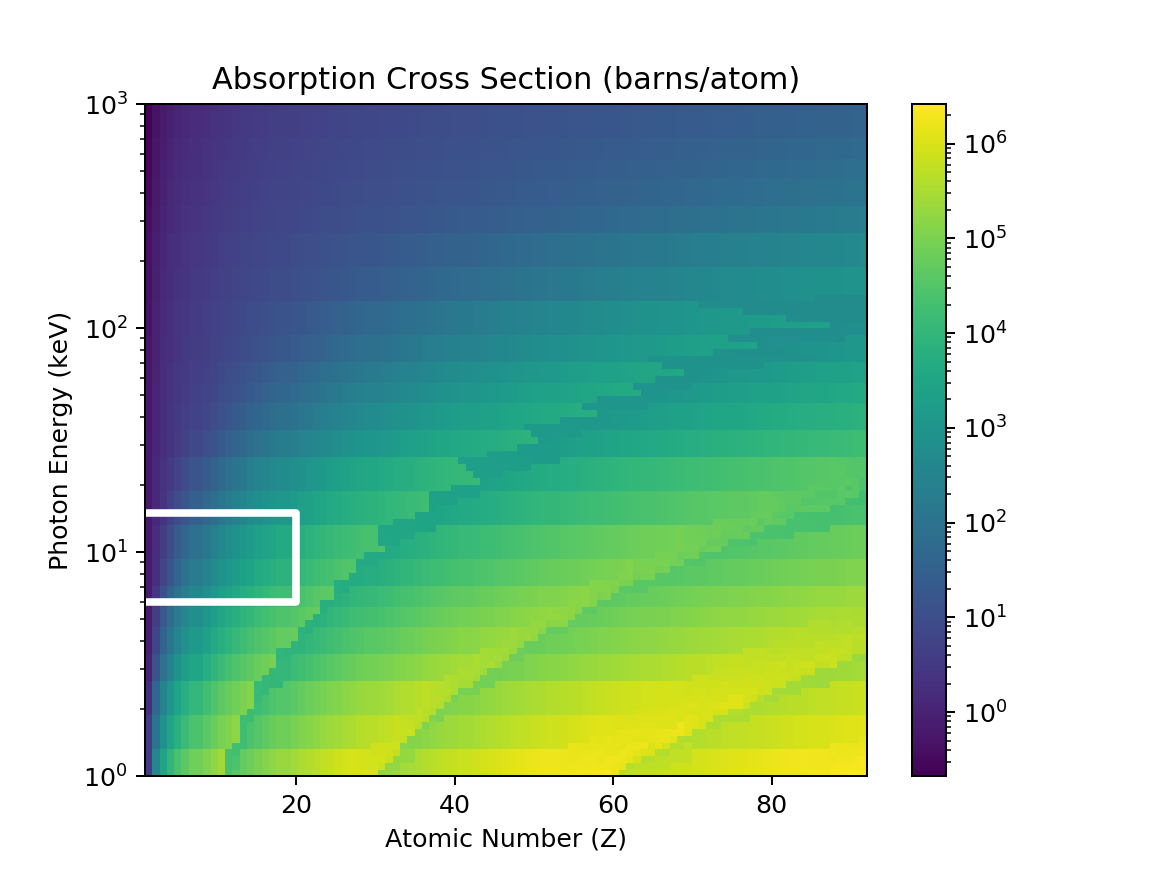

In [60]:
#This is nearest neighbor interpolation

ykey = 'Energy'
xkey = 'Z'
zkey = 'SIGMA'


X = df[xkey].values
Y = df[ykey].values
Z = df[zkey].values


n = 100
Zi = np.zeros((n, n))

Xi = np.dstack(np.meshgrid(
    np.linspace(X.min(), X.max(), n),
    np.logspace(0, 3, n)
))
Xi = Xi.reshape((n**2, 2))
Xo = np.vstack((X, Y)).T

idx = np.argmin(np.linalg.norm(Xi[:,None] - Xo, 2, 2), 1)
Zi  = Z[idx].reshape((n,n)) * 1e24

norm = mpl.colors.LogNorm(Zi.min(), Zi.max())

plt.figure()
ax = plt.pcolor(Xi[:,0].reshape((n,n)), Xi[:,1].reshape((n,n)), Zi, norm=norm)
plt.colorbar()
plt.title("Absorption Cross Section (barns/atom)")
plt.xlabel("Atomic Number (Z)")
plt.ylabel("Photon Energy (keV)")
plt.yticks(range(0, 100, 10), )
#plt.xticks(plt.xticks()[0], 1 + np.int64(plt.xticks()[0]))
xlim = plt.xlim()
plt.plot([0, 20, 20, 0], [6, 6, 15, 15], 'w', linewidth=3)
plt.text()
plt.yscale('log')



![Roentgen](images/roentgen_xray.jpg "image")

<IPython.core.display.Javascript object>


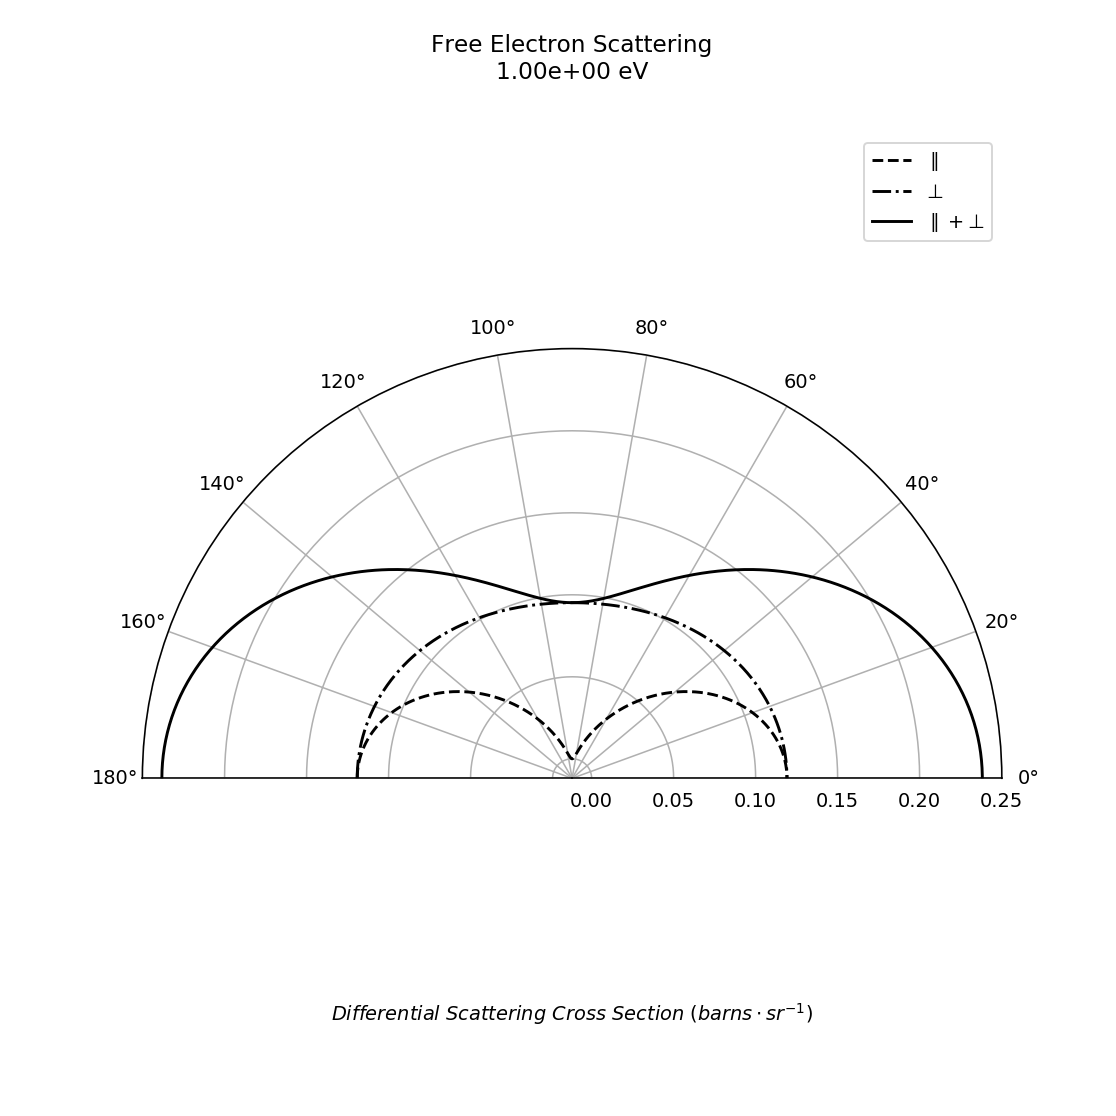

interactive(children=(FloatSlider(value=0.0, description='logeV', max=5.0), Output()), _dom_classes=('widget-i…

In [86]:
Z = None
num_points = 500
theta = np.deg2rad(np.linspace(0, 180, num_points))
ko = 1

dI_para = scatter.differential_intensity(theta, np.zeros(num_points), ko, Z) 
dI_perp = scatter.differential_intensity(theta, 90.*np.ones(num_points), ko, Z)
f = plt.figure(figsize=(8,8))
ax1 = plt.polar(np.pi - theta, dI_para, '--k', label=r"$\parallel$")[0]
ax2 = plt.polar(np.pi - theta, dI_perp, '-.k', label=r"$\bot$")[0]
ax3 = plt.polar(np.pi - theta, dI_perp + dI_para, 'k', label=r"$\parallel + \bot$")[0]
plt.xlabel(r"$Differential\ Scattering\ Cross\ Section\ (barns\cdot sr^{-1})$")
f.canvas.draw()
ax = plt.gca()
ax.set_thetamin(0)
ax.set_thetamax(180)
plt.legend()

@interact(logeV = (0., 5, 0.1))
def update(logeV=0.):
    #print(ko)
    ko = 10.**logeV
    print(ko)
    plt.title("Free Electron Scattering\n{:1.2e} eV".format(ko))
    dI_para = scatter.differential_intensity(theta, np.zeros(num_points), ko, Z) 
    dI_perp = scatter.differential_intensity(theta, 90.*np.ones(num_points), ko, Z)
    
    ax1.set_data(np.pi - theta, dI_para)
    ax2.set_data(np.pi - theta, dI_perp)
    ax3.set_data(np.pi - theta, dI_perp + dI_para)
    plt.xlabel(r"$Differential\ Scattering\ Cross\ Section\ (barns\cdot sr^{-1})$")
    f.canvas.draw_idle()
    

<IPython.core.display.Javascript object>


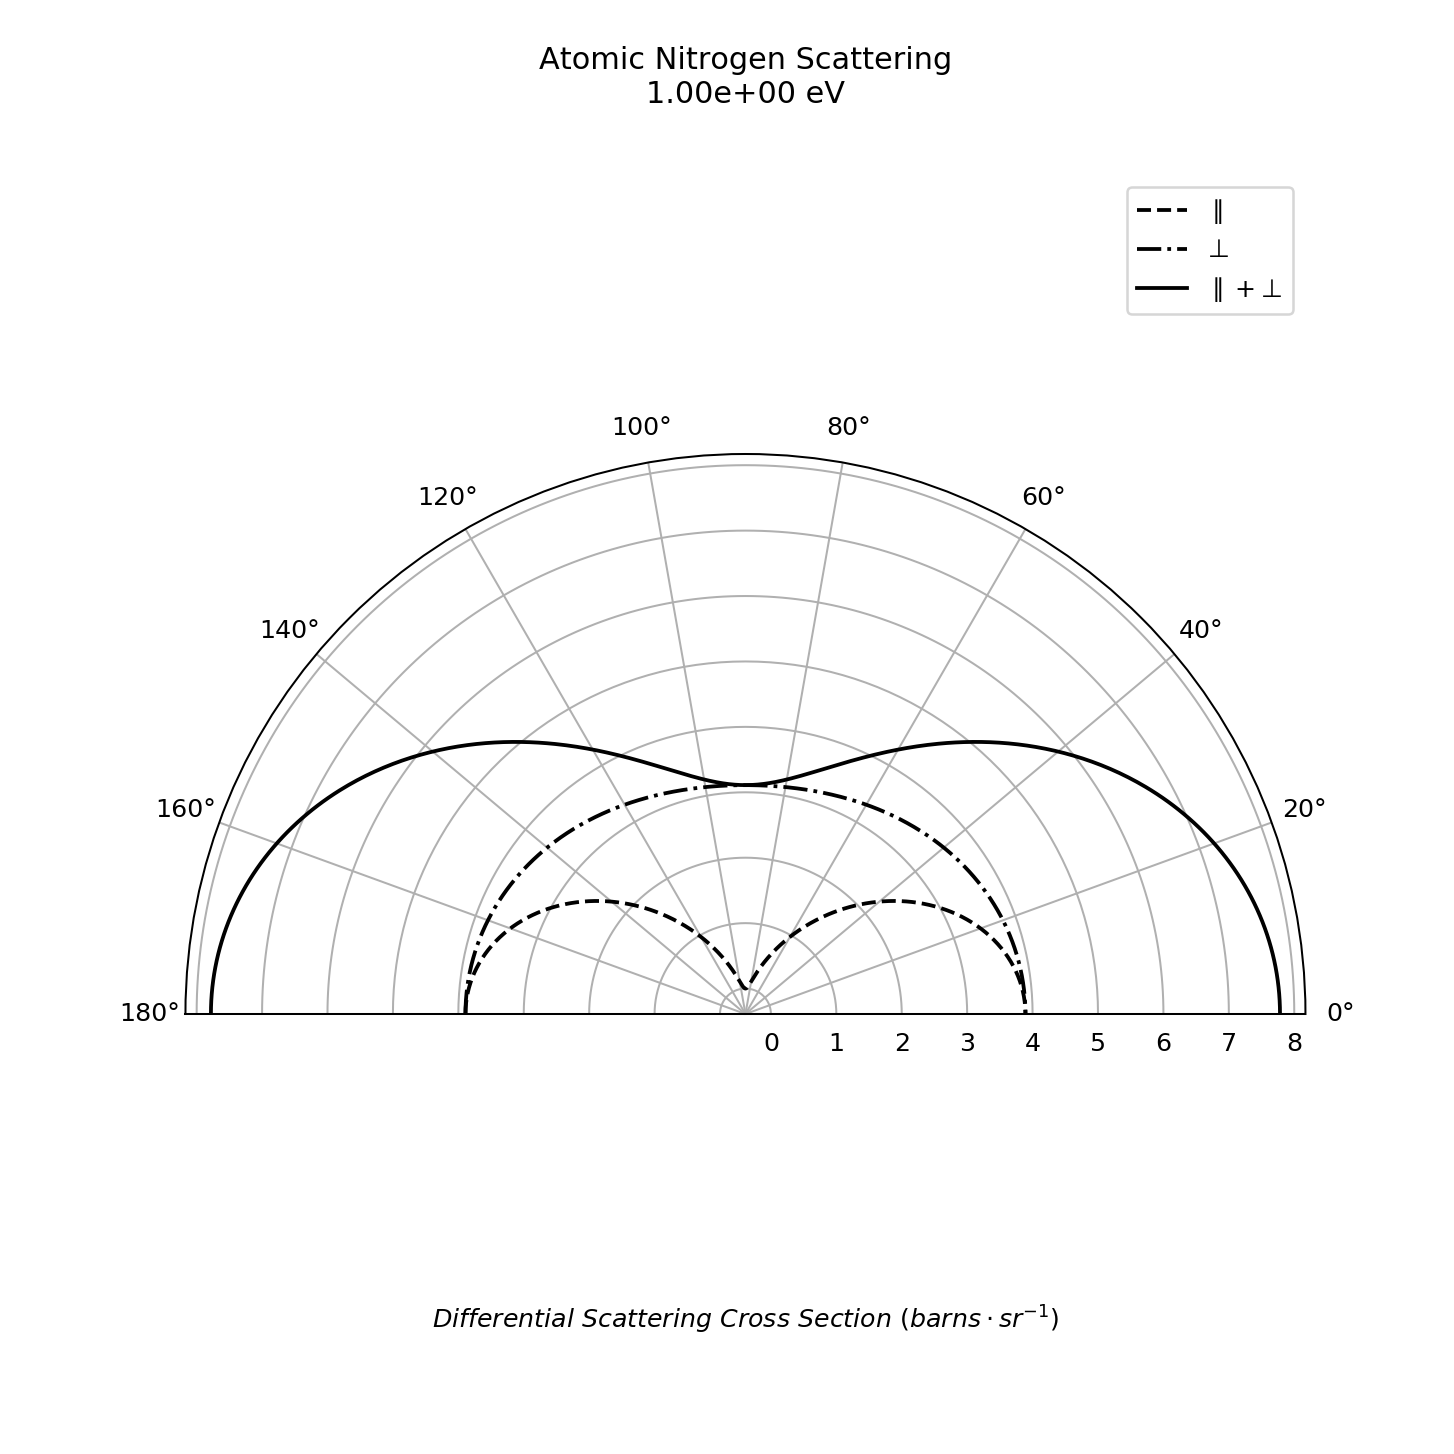

interactive(children=(FloatSlider(value=0.0, description='logeV', max=5.0), Output()), _dom_classes=('widget-i…

In [56]:
Z = 7
num_points = 500
theta = np.deg2rad(np.linspace(0, 180, num_points))
ko = 1

dI_para = scatter.differential_intensity(theta, np.zeros(num_points), ko, Z) 
dI_perp = scatter.differential_intensity(theta, 90.*np.ones(num_points), ko, Z)
f = plt.figure(figsize=(8,8))
ax1 = plt.polar(np.pi - theta, dI_para, '--k', label=r"$\parallel$")[0]
ax2 = plt.polar(np.pi - theta, dI_perp, '-.k', label=r"$\bot$")[0]
ax3 = plt.polar(np.pi - theta, dI_perp + dI_para, 'k', label=r"$\parallel + \bot$")[0]
plt.xlabel(r"$Differential\ Scattering\ Cross\ Section\ (barns\cdot sr^{-1})$")
f.canvas.draw()
ax = plt.gca()
ax.set_thetamin(0)
ax.set_thetamax(180)
plt.legend()

@interact(logeV = (0., 5, 0.1))
def update(logeV=0.):
    #print(ko)
    ko = 10.**logeV
    print(ko)
    plt.title("Atomic Nitrogen Scattering\n{:1.2e} eV".format(ko))
    dI_para = scatter.differential_intensity(theta, np.zeros(num_points), ko, Z) 
    dI_perp = scatter.differential_intensity(theta, 90.*np.ones(num_points), ko, Z)
    
    ax1.set_data(np.pi - theta, dI_para)
    ax2.set_data(np.pi - theta, dI_perp)
    ax3.set_data(np.pi - theta, dI_perp + dI_para)
    plt.xlabel(r"$Differential\ Scattering\ Cross\ Section\ (barns\cdot sr^{-1})$")
    f.canvas.draw_idle()
    

<IPython.core.display.Javascript object>


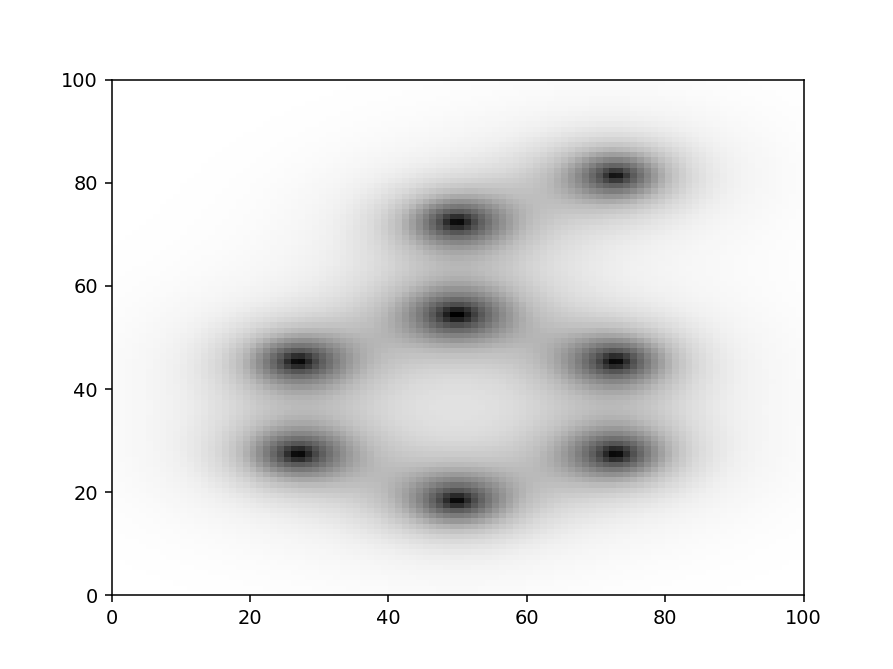

In [165]:
n = 100
border = 1 
cmapname='Greys'

nuclei = np.array([
    [np.cos(np.deg2rad(30.)), np.sin(np.deg2rad(30.))], 
    [np.cos(np.deg2rad(30.)), -np.sin(np.deg2rad(30.))], 
    [np.cos(np.deg2rad(150.)), np.sin(np.deg2rad(150.))], 
    [np.cos(np.deg2rad(150.)), -np.sin(np.deg2rad(150.))], 
    [0, 1],
    [0, 2],
    [np.cos(np.deg2rad(30)), 2+np.sin(np.deg2rad(30))],
    [0,-1],
])

X,Y = np.meshgrid(
    np.linspace(nuclei.min(0)[0]-border, nuclei.max(0)[0]+border, n),
    np.linspace(nuclei.min(0)[1]-border, nuclei.max(0)[1]+border, n),
)

electron_density = np.zeros((n, n))
for x,y in nuclei:
    electron_density += np.exp(-np.sqrt((x -X)**2 + (y-Y)**2)/0.3)
plt.figure()
plt.pcolormesh(electron_density, cmap=cmapname)


<IPython.core.display.Javascript object>


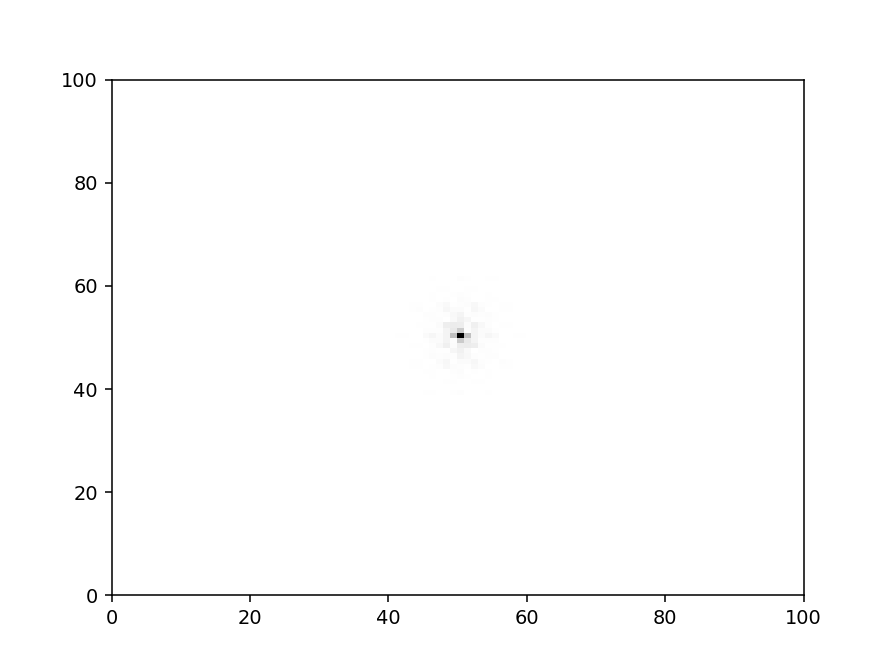

In [159]:
plt.figure()
plt.pcolormesh(np.fft.fftshift(np.abs(np.fft.fftn(Z))), cmap=cmapname)

<IPython.core.display.Javascript object>


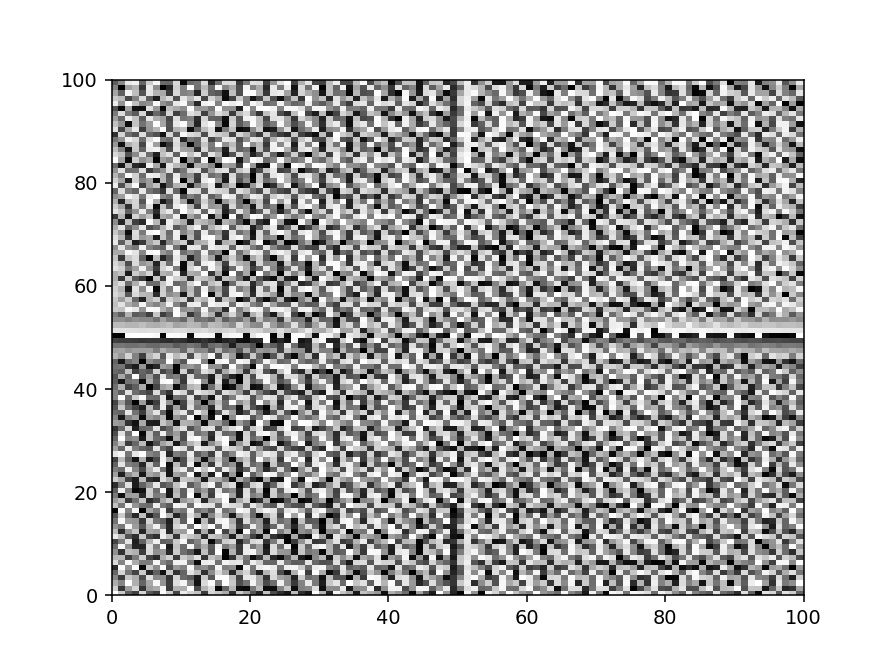

In [158]:
plt.figure()
plt.pcolormesh(np.fft.fftshift(np.angle(np.fft.fftn(Z))), cmap=cmapname)

<IPython.core.display.Javascript object>


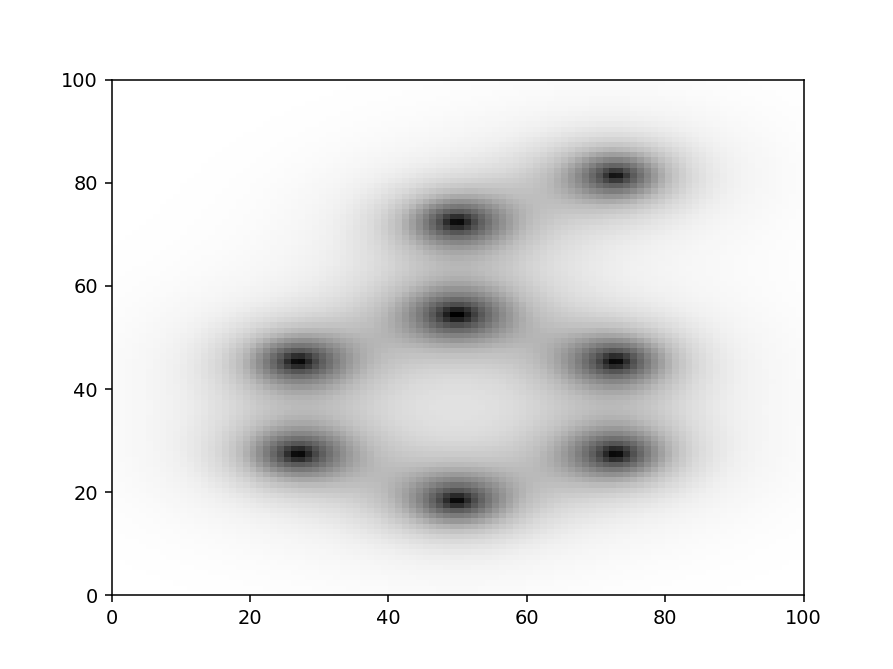

In [164]:
plt.figure()
plt.pcolormesh(
    np.real(
        np.fft.ifftn(
            np.fft.fftn(Z))), cmap=cmapname)